<center><b>SVM</b></center>

In [1]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#==============================================================================
# imort the dataset of Home Buyers prices
#==============================================================================
flatdata = pd.read_csv ('HomeBuyer.csv')
X = flatdata.iloc [:,[0,1]].values
y = flatdata.iloc [:,2].values

In [3]:
#==============================================================================
# split the dataset into training and test set. We will use 75/25 approach
#==============================================================================
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/4, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#==============================================================================
# Feature scalling 
#==============================================================================
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
#==============================================================================
# Fit the SVM to the train data.
# probability = True is used to calculate probability also.
#==============================================================================
from sklearn.svm import SVC
SVC_Classifier = SVC (kernel = 'linear', random_state = 0, probability = True )
SVC_Classifier.fit (X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [6]:
#==============================================================================
# Predict the values 
#==============================================================================

prediction = SVC_Classifier.predict (X_test)

print("")
print("prediction for test data :-")
print(prediction)
print("")


prediction for test data :-
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]



In [7]:
#==============================================================================
# Create confusion matrix to evaluate performance of data
#==============================================================================
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)

[[66  2]
 [ 8 24]]


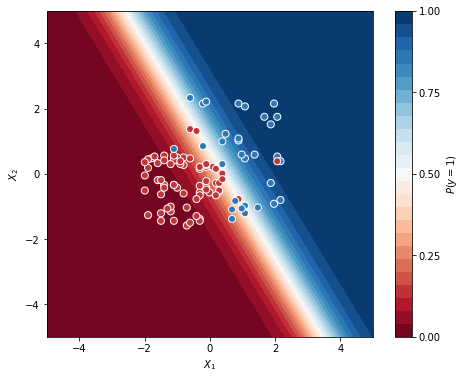

In [8]:
#==============================================================================
# let us visualize it
#==============================================================================
    
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = SVC_Classifier.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()